In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.color
import skimage.filters
from scipy import signal
import random
import colorsys
from PIL import Image

In [2]:
def load_image_as_np_array(filepath):
    # Open the image file
    img = Image.open(filepath)
    
    # Convert the image to a NumPy array
    img_array = np.array(img)
    
    return img_array

def display_images(images, titles,max_img_per_row=3,vmin=0,vmax=255,conversion=cv2.COLOR_BGR2RGB):
   
    num_images = len(images)
    max_images_per_row = max_img_per_row
    num_rows = (num_images + max_images_per_row - 1) // max_images_per_row  # Calculate number of rows needed
    
    # Create the subplots
    fig, axs = plt.subplots(num_rows, max_images_per_row, figsize=(15, 5 * num_rows))
    
    # Flatten the axs array in case of multiple rows
    axs = axs.flatten()
    
    for i in range(num_images):
        # disp_image = cv2.cvtColor(images[i].astype(np.uint8),conversion)
        axs[i].imshow(images[i],cmap='grey')
        axs[i].set_title(titles[i])
        axs[i].axis('off')  # Hide axes
    
    # Turn off remaining subplots if there are any
    for i in range(num_images, len(axs)):
        axs[i].axis('off')
    
    plt.tight_layout()
    plt.show()

#Task 1: Dilation and Erosion
You are required to implement two functions that will simulate the behaviour of morphological Dilation and Erosion. For each of these functions, we will be considering a parameter, $SE$, which denotes the structuring element which we will need to preconstruct before passing them to the corresponding function.

Complete the two functions given in the following code cells:

In [3]:
def dilation(image,kernel):

    kw,kh=kernel.shape
    iw,ih=image.shape

    padtop,padbottom=(kw//2,kw//2)
    padleft,padright=(kh//2,kh//2)

    imagepadded=np.pad(image,((padtop,padbottom),(padleft,padright)))

    output=np.zeros((iw,ih)).astype(np.float32)

    for i in range(iw):
        for j in range(ih):

            pixels = np.sum(imagepadded[i:i+kw,j:j+kh])

            if pixels > 0:
                output[i,j] = True
            else:
                output[i,j] = False

    return output

In [4]:
def erosion(image,kernel):



    kw,kh=kernel.shape
    iw,ih=image.shape

    padtop,padbottom=(kw//2,kw//2)
    padleft,padright=(kh//2,kh//2)

    imagepadded=np.pad(image,((padtop,padbottom),(padleft,padright)))

    output=np.zeros((iw,ih)).astype(np.float32)

    for i in range(iw):
        for j in range(ih):

            pixels = np.sum(imagepadded[i:i+kw,j:j+kh])

            if pixels  == kw*kh:
                output[i,j] = True
            else:
                output[i,j] = False

    return output

# Task 1: Output and Analysis
For this task, use an appropriate image from Chapter 09.zip. Use your previously implemented functions to show the outputs of the dilation and erosion functions on the sample image. In addition, generate required outputs to provide your analysis on the following observations:

 * What happens when you apply dilation on a sample image multiple times using the same structuring element?  

 * What happens when you apply erosion on a sample image multiple times using the same structuring element?



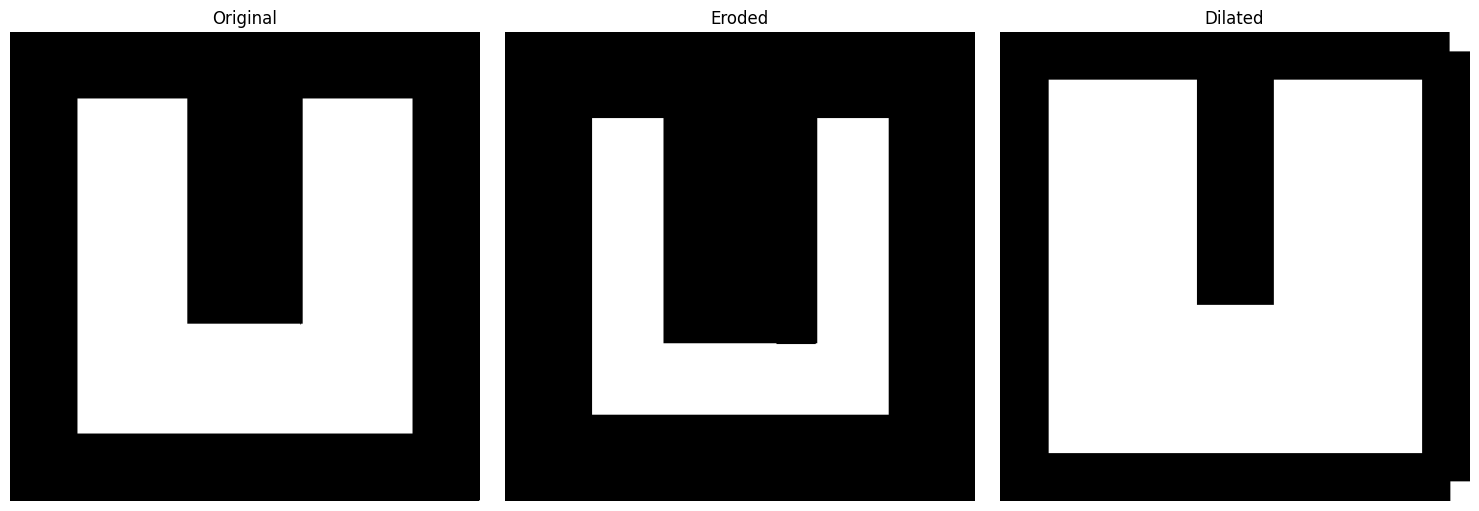

In [5]:
# Generate outputs for Task 1 here
filepath = 'ushape.tif'
uimage = load_image_as_np_array(filepath)


arr = np.ones(shape=(50,50))*255.0


eroded = erosion(uimage,arr)
dilated = dilation(uimage,arr)

images = [uimage,eroded,dilated]
titles = ['Original','Eroded','Dilated']

display_images(images,titles)


##Analysis:

 * What happens when you apply dilation on a sample image multiple times using the same structuring element?  
 Ans: Upon applying repeated dilation on a sample image, the foreground pixels will start increasing in size progressively, then at one point the whole image will be covered only by the foreground pixels.

 * What happens when you apply erosion on a sample image multiple times using the same structuring element?  
 Ans: Upon applying erosion on a sample image, the foreground pixels will start decreasing in size progressively.As a result after multiple iterations of erosion, the foreground pixels will be completely lost and the image will become black.


 NB. : There are two pixel in the corners which are white, thus when the dilation is done on the image the two pixels dilate by the size of the structuring element. As the structuring element was square, there appears 2 squares on the two corners.



# Task 2
Granulometry is a field that deals with determining the size distribution of particles in an image. Determine the sizes of granules in "Fig0941(a)(wood_dowels).tif" which is an image of wood dowel plugs of two dominant sizes.

Your task is to write a function which should perform opening with circular SEs of variable sizes and generate a graph plot showing the difference in surface area vs radius of SE.

It is recommended to apply smoothing on the given image before you apply the Opening operations.

In [6]:
def opening(image, SE):
  #implement this function
  open_image  = cv2.morphologyEx(image , cv2.MORPH_OPEN , kernel=SE)

  return open_image

def closing(image, SE):
  #implement this function
  open_image  = cv2.morphologyEx(image , cv2.MORPH_CLOSE , kernel=SE)

  return open_image

In [7]:
def granulometry(image, maxsize=200):
  #implement this function

  area_graph = []
  for i in range(5,maxsize):
    circularSE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,ksize=(i,i))
    riceOpen = opening(image,circularSE)

    sum = np.sum(riceOpen)
    area_graph.append(sum)


  area_graph = np.array(area_graph,dtype='float32')
  diff_graph = -np.diff(area_graph,n=1)

  
  print(f'{np.max(diff_graph)},{np.argmax(diff_graph)}')


  return diff_graph

# Task 2: Output and Analysis
Use your previously implemented functions to show the output of the granulometry technique on the mentioned sample image.

Provide your analysis on the following topic:
<ol>
<li> Why is it recommended to apply smoothing first before performing the opening? </li>

</ol>

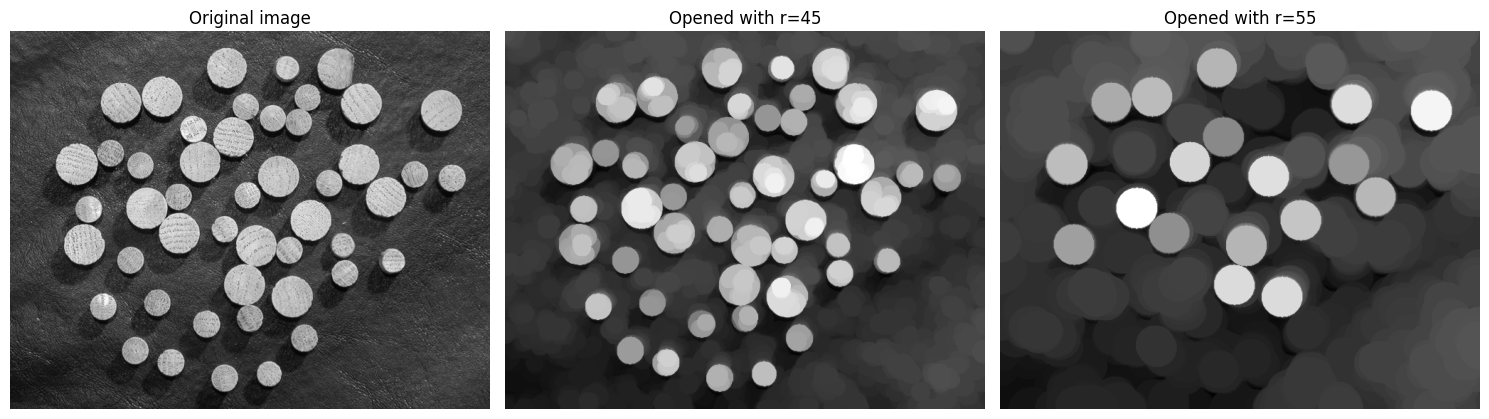

1685593.0,50


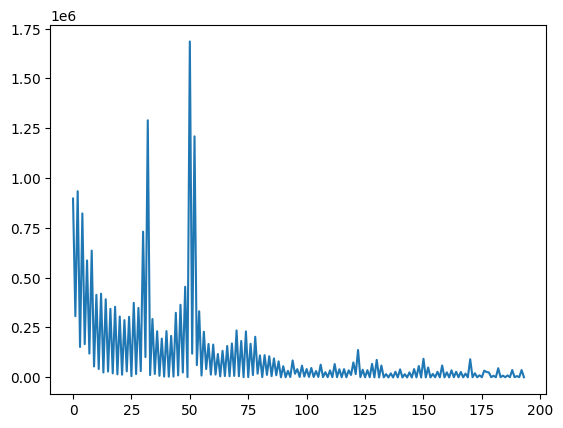

In [14]:
#Generate output for Task 2 here
filepath = 'granulometry.tif'
ricegrain = load_image_as_np_array(filepath=filepath)


circularSE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,ksize=(25,25))
circularSE50 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,ksize=(55,55))

riceOpen = opening(ricegrain,circularSE)
riceOpen2 = opening(ricegrain,circularSE50)

images = [ricegrain,riceOpen,riceOpen2]
titles = ['Original image','Opened with r=25','Opened with r=55']

display_images(images, titles)


graph = granulometry(image=ricegrain)

plt.plot(range(len(graph)),graph)
plt.show()

## Analysis:
* Why is it recommended to apply smoothing first before performing the opening?  
Ans: Smoothing is recommended to be applied because there might be lot of noises in the image which correspond to small grains/holes. Thus for a certain noise grain , if granulometry is done the noise is removed and the difference plot gives a big spike. This is unwanted as we did not want to detect the radius of the noise elements rather our target was to detect the radius of the grain particles. Thus smoothing is applied to remove the noise. The graph above, smoothing is not done , thus there are spikes on the 0 end. This is because  there were some single pixel noises which were eleminated due to opening with r>2. Thus this resulted in spikes.

# Task 3
Consider the image given in "FigP0934(blobs_in_circular_arrangement).tif", which shows a region of small circles enclosed by a region of larger circles. Locate the boundary between those distinct texture regions.

In [77]:
def locateBoundary(image):
  #implement this function

  small_rad = 46
  big_rad = 90

  se_small = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,ksize=(small_rad,small_rad))
  se_big = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,ksize=(big_rad,big_rad))

  image_with_boundary = closing(image,SE=se_small)
  image_with_boundary = opening(image_with_boundary,SE=se_big)

  eroded = cv2.erode(image_with_boundary,kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,ksize=(5,5)))

  image_with_boundary  = image_with_boundary - eroded

  return image_with_boundary


# Task 3: Output and Analysis
Show the output of the locateBoundary function on the mentioned sample image.

* Closing is done to close the dark small circles. To close the dark small circles the radius was r > radius of small circles. Thus the inner region became white and small circles removed.
* For the big circles, we did opening  with a radius r > largest border between 2 big circles. Thus the outer big cirle region became dark.
* Morphological gradient operation was done to find the border of the dark and bright regions. Lastly, the gradient was added to the input image to visualize the boundaries.

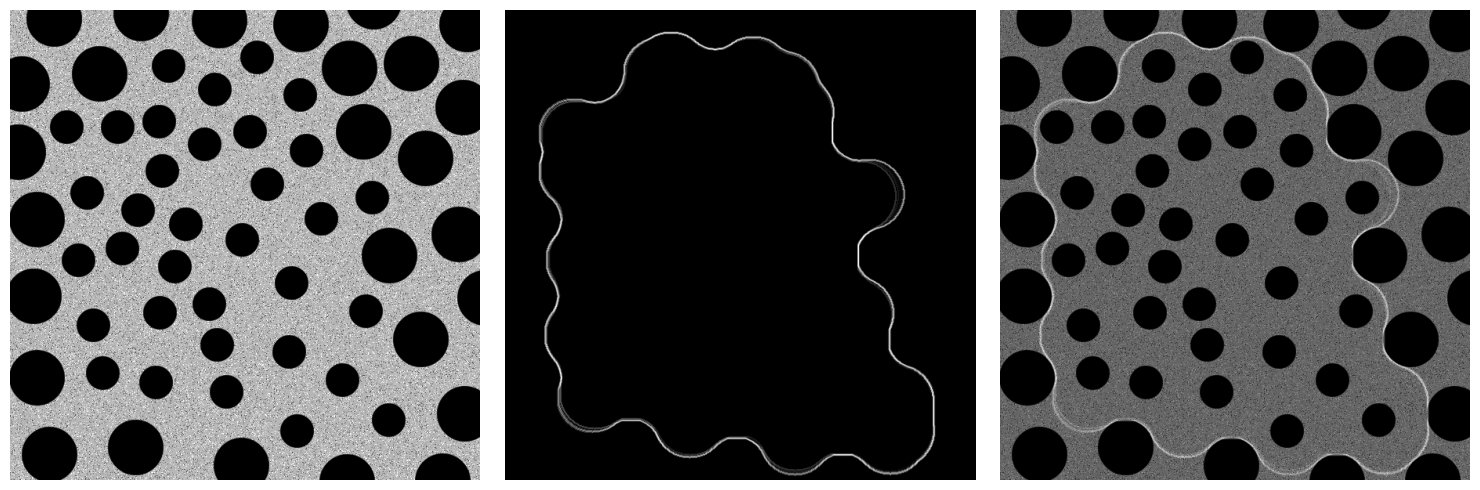

In [174]:
#Generate output for Task 3 here
blobs = load_image_as_np_array('blobs.tif')


blob_closed = locateBoundary(blobs)

images = [blobs,blob_closed,(blobs + 0.8*(blob_closed))]
titles = ['','','']

display_images(images, titles)



# Task 4
A preprocessing step in an application of microscopy is concerned with the issue of isolating individual round particles from similar particles that overlap in groups of two or more particles as shown in the image "FigP0936(bubbles_on_black_background).tif".

Assuming that all particles are of the same size, propose a morphological algorithm that produces three images consisting respectively of
<ol>
<li> Only of particles that have merged with the boundary of the image.</li>

<li> Only overlapping particles.</li>

<li> Only nonoverlapping particles.</li>

</ol>

In [77]:
def cca(image_inp, coordinate):
    image = image_inp.copy().astype(np.float32)
    output =  np.zeros(image.shape,dtype='float32')

    output[coordinate[0],coordinate[1]] = 1.0

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,ksize=(80,80))


    while True:

      temp = cv2.dilate(output , kernel)
      new = temp * image

      if np.array_equal(new, output):
        break
      output = new

    return output, np.sum(output)

def boundary(image_inp):

  return cca(image_inp,(0,0))


def overlappingParticlesFunc(image, area_threshold):
  
  w,h = image.shape

  output = np.zeros(image.shape,dtype=np.float32)

  for i in range(w):
    for j in range(h):
      

      if image[i,j] < 1.0:
        continue
      
      op , area =cca(image,(i,j))
      # area ,res, _ ,_  = cv2.floodFill(temp,None,(i,j),2.0)
      if area > area_threshold:
        output += op
        output = np.clip(output,a_min=0.0,a_max=1.0)

  return output
                                 

    
   

def microscopy(image):
  #implement this function

  image_temp = image.copy()

  boundaryParticles,_= boundary(image_temp)

  image_temp -= boundaryParticles

  overlappingParticle = overlappingParticlesFunc(image_temp,300.0)

  nonOverlappingParticle = overlappingParticle - image_temp
  
  # return boundaryParticles,None,None
  return boundaryParticles, overlappingParticle, nonOverlappingParticle

# Task 4: Output and Analysis
Show the output of the microscopy function on the mentioned sample image.

In [ ]:
rad = 16

In [78]:

bubbles = load_image_as_np_array('bubbles.tif')

bubbles = bubbles.astype(np.float32)

In [ ]:

boundaryBubbles , overlapBubbles, _ = microscopy(bubbles)

images = [bubbles,boundaryBubbles,overlapBubbles]
titles = ['bubbles','boundary','overlap']

display_images(images,titles)

## Analysis

* Only of particles that have merged with the boundary of the image.  
Ans: The image was observed to have a white boundary. Thus doing a connected component analysis with the starting pixel in the boundary position gave us the required output. This output showed us the connected bubbles overlapping with the boundary region.

* Only overlapping particles.  
Ans: We have done connected component analysis on each of the pixels in the input image. The images with non overlapping circles returned an area equal to the circle/bubble itself. Overlapping regions had a higher area. Depending on that threshold we could determine if the area was overlapping or non overlapping. The overlapping regions were unioned and returned.  

Radius Determination: 

* Only nonoverlapping particles.

